# 🧠 Mushroom Classification Project / Mantar Sınıflandırma Projesi


In [2]:
# Gerekli kütüphaneleri içe aktar / Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Veri setini yükle / Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
                 header=None)

In [4]:
# Sütun isimlerini veri kümesine ekle / Assign column names to the dataset
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df.columns = column_names

In [5]:
# İlk 5 satırı göster / Display first 5 rows
print(" İlk 5 satır / First 5 rows:")
print(df.head())

 İlk 5 satır / First 5 rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

In [6]:
# Veri kümesinin temel bilgilerini göster / Show basic dataset info
print("\n📋 Veri Kümesi Özeti / Dataset Summary:")
print(df.info())


📋 Veri Kümesi Özeti / Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-nul

In [7]:
# Eksik değerleri '?' ile gösterildiğinden tespit et / Detect missing values represented by '?'
print("\n '?' içeren değerler / Values containing '?':")
for col in df.columns:
    if df[col].astype(str).str.contains('\?').any():
        print(f"- Eksik veri olabilir: {col}")


 '?' içeren değerler / Values containing '?':
- Eksik veri olabilir: stalk-root


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
# '?' karakterlerini eksik veri olarak kabul et / Replace '?' with NaN (missing values)
df.replace('?', np.nan, inplace=True)

# Eksik veri içeren sütunları kontrol et / Check which columns still have missing values
print("\n🧹 Eksik veriler / Missing values:")
print(df.isnull().sum())


🧹 Eksik veriler / Missing values:
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [10]:
# Eksik değerleri en sık görülen (mod) değerle doldur / Fill missing values with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
# Eksik verilerin artık kalmadığını kontrol et / Check again for missing values
print("\n✅ Güncel eksik veri durumu / Missing values after filling:")
print(df.isnull().sum())


✅ Güncel eksik veri durumu / Missing values after filling:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [12]:
# Tüm sütunlar kategorik olduğu için Label Encoding uygulayacağız
# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()

In [13]:
# Tüm sütunları tek tek encode et / Encode each column individually
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
# Encode sonrası örnek veri göster / Show a sample after encoding
print("\n Sayısallaştırılmış veri örneği / Encoded sample data:")
print(df.head())


 Sayısallaştırılmış veri örneği / Encoded sample data:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  sta

C:\Users\aziz-\AppData\Local\Temp\ipykernel_4584\2419617052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


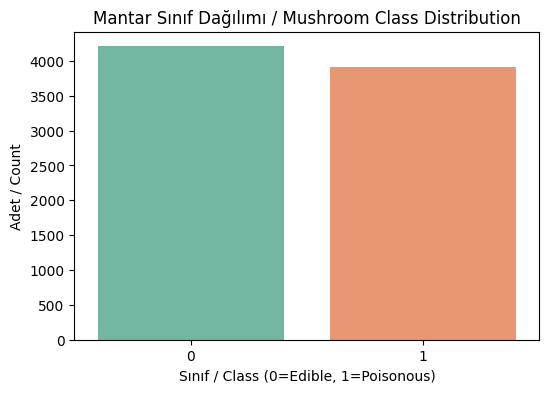

In [15]:
# Sınıf dağılımını görselleştir / Visualize class distribution (edible vs poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', palette='Set2')
plt.title("Mantar Sınıf Dağılımı / Mushroom Class Distribution")
plt.xlabel("Sınıf / Class (0=Edible, 1=Poisonous)")
plt.ylabel("Adet / Count")
plt.show()

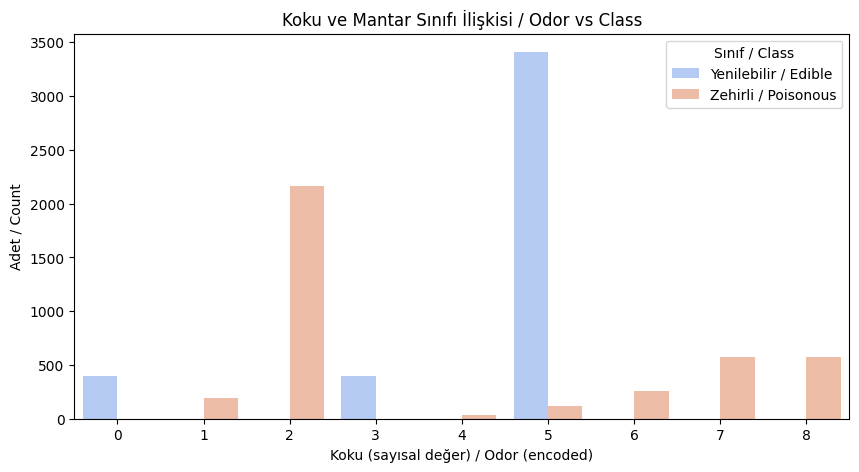

In [16]:
# Özelliklerden biri ile sınıf arasındaki ilişkiyi analiz et – örneğin 'odor'
# Analyze class distribution by odor (kokunun etkisi)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='odor', hue='class', palette='coolwarm')
plt.title("Koku ve Mantar Sınıfı İlişkisi / Odor vs Class")
plt.xlabel("Koku (sayısal değer) / Odor (encoded)")
plt.ylabel("Adet / Count")
plt.legend(title="Sınıf / Class", labels=["Yenilebilir / Edible", "Zehirli / Poisonous"])
plt.show()

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


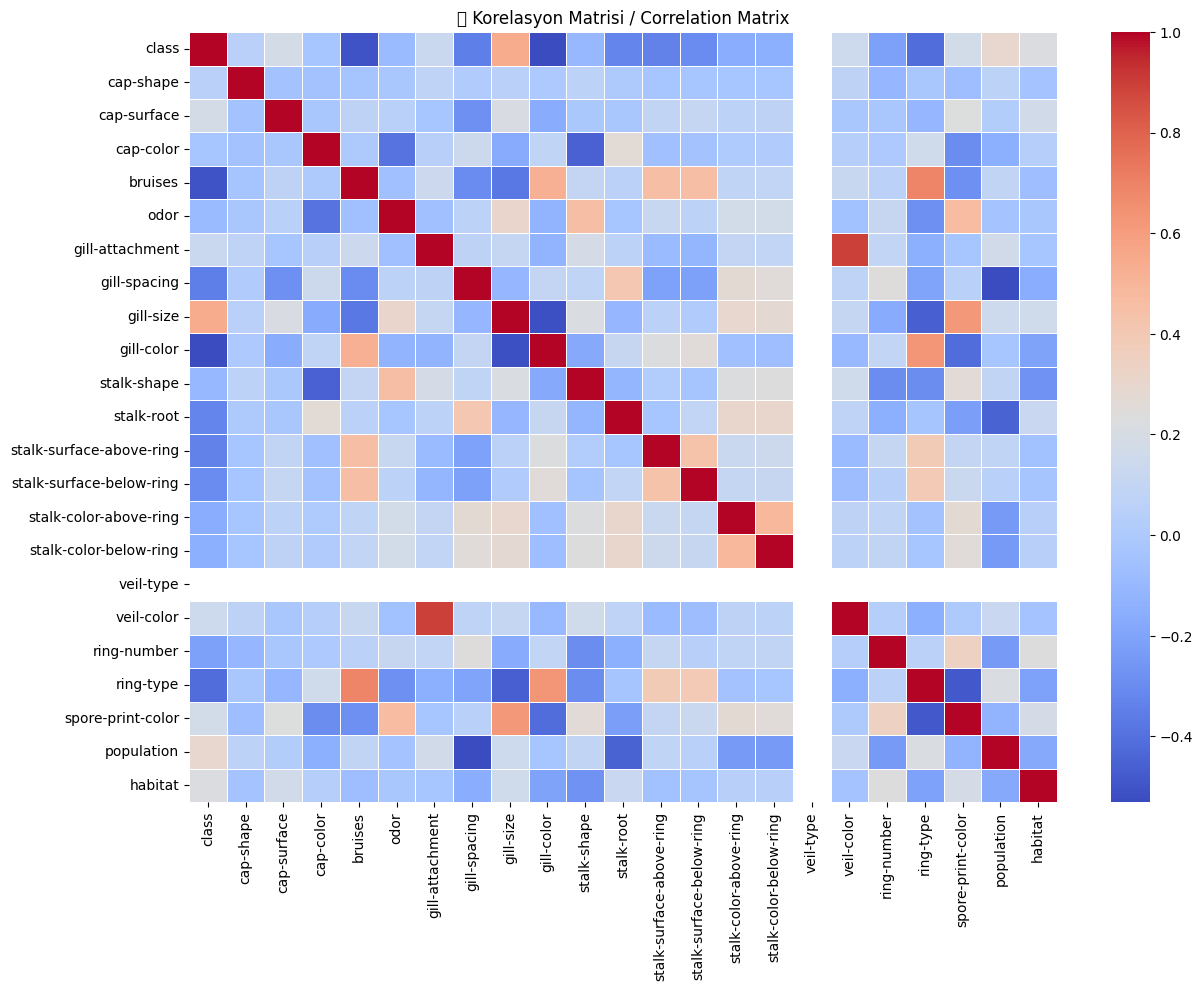

In [17]:
# Özellikler arası korelasyon matrisi / Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("📈 Korelasyon Matrisi / Correlation Matrix")
plt.show()

In [18]:
# Gerekli kütüphaneleri içe aktar / Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
# Özellikleri (X) ve hedef değişkeni (y) ayır / Separate features and target
X = df.drop("class", axis=1)
y = df["class"]

In [20]:
# Eğitim ve test seti oluştur (80/20 oranıyla) / Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Modeli tanımla ve eğit / Define and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Test verisinde tahmin yap / Predict on test set
y_pred = model.predict(X_test)

In [23]:
# Doğruluk skorunu hesapla / Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f" Doğruluk Oranı / Accuracy Score: {accuracy:.4f}")

 Doğruluk Oranı / Accuracy Score: 1.0000


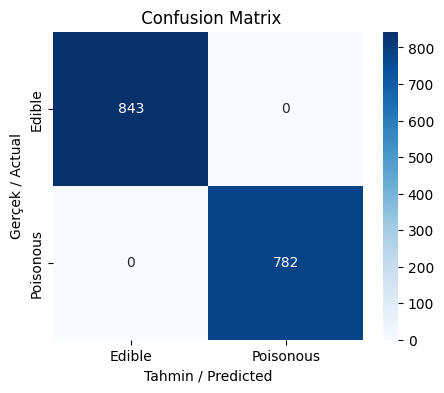

In [24]:
# Confusion Matrix göster / Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title(" Confusion Matrix")
plt.xlabel("Tahmin / Predicted")
plt.ylabel("Gerçek / Actual")
plt.show()

In [25]:
# Sınıflandırma raporu / Classification report
print("\n Sınıflandırma Raporu / Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))


 Sınıflandırma Raporu / Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [26]:
# Özellik önem derecelerini al ve görselleştir / Get and visualize feature importances
importances = model.feature_importances_
features = X.columns


In [27]:
# En önemli 10 özelliği al / Top 10 features
top_indices = np.argsort(importances)[::-1][:10]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

C:\Users\aziz-\AppData\Local\Temp\ipykernel_4584\1402056997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis")


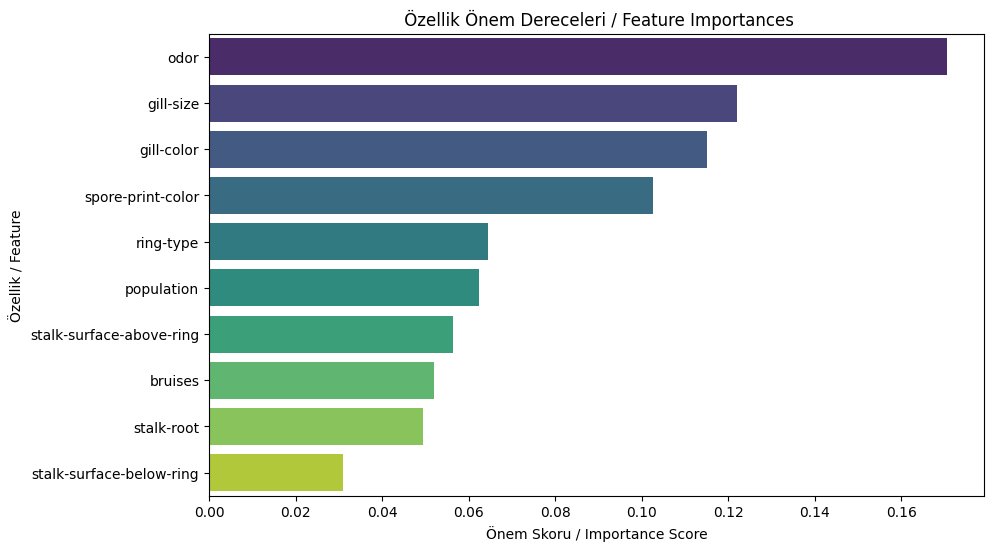

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.title(" Özellik Önem Dereceleri / Feature Importances")
plt.xlabel("Önem Skoru / Importance Score")
plt.ylabel("Özellik / Feature")
plt.show()